In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from utils import create_translation_dic

In [64]:
def get_enrollment_df(adm_year, translation_mapper):
    relevant_keys=['Masked ID for student','Year of academic process for admission']
    all_df = []
    # Read in data
    df = pd.read_csv("data/admissions/D_PSU_Matrícula/D_MATRICULA_PSU_{}_PRIV_MRUN.csv".format(adm_year), sep=";", encoding='latin-1')
    # Replace empty strings with NaN
    df = df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)

    # Translate columns
    df.columns = map(str.upper, df.columns)
    df = df.rename(columns={'AÑO_PROCESO': 'ANYO_PROCESO', 
                            'CODIGO_CARRERA': 'CÓDIGO_CARRERA', 
                            'SEDE_CARRERA': 'SEDE', 
                            'LUGAR':'LUGAR_EN_LA_LISTA',
                            'POND_AÑO_ACAD':'POND_ANYO_ACAD',
                            'AÃO_PROCESO':'ANYO_PROCESO',
                            'POND_AÃO_ACAD': 'POND_ANYO_ACAD',
                            'Ï»¿TIPO_IDENTIFICACION': "TIPO_IDENTIFICACION"
                           })
    df = df.rename(columns=translation_mapper)

    #Only look at students with admission year equal to adm_year
    df = df[df['Year of academic process for admission']==adm_year]
    df = df[relevant_keys]
    df.reset_index(inplace=True, drop=True)
    all_df.append(df)
        
    main_df = pd.concat(all_df, ignore_index=True)
    return main_df

In [65]:
years = list(range(2007, 2016))
enrollment_mapper = create_translation_dic("Enrollment")
n_enrolled = []

for year in years:
    df = get_enrollment_df(int(year), translation_mapper=enrollment_mapper)
    n_enrolled.append(len(df))

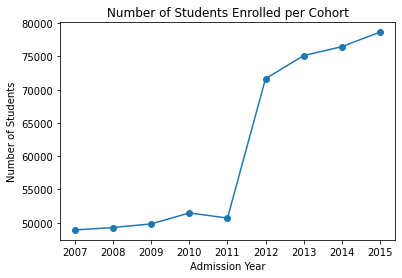

In [66]:
plt.plot(years, n_enrolled, marker="o")
plt.xlabel("Admission Year")
plt.ylabel("Number of Students")
plt.title("Number of Students Enrolled per Cohort")
plt.savefig("figs/enrollment.pdf")